# Súčin normálnych rozdelení

Matematické operácie nad náhodnými premennými sú základom teórie Kálmánových filtrov. 
 

In [1]:
%reset -f  
%matplotlib inline

from numpy import *
from numpy.random import normal, randn
import matplotlib.pyplot as plt

Vlastnosti súčinu normálnych rozdelení dvoch nezávislých náhodných premenných môžeme odvodiť z nasledujúcich vzťahov (súčin funkcií rozdelenia hustoty pravdepodobností <b>nie</b> je ekvivalentom súčinu hodnôt náhodných premenných):

\begin{equation}
\mathcal{N}(\mu, \sigma^2) = \mathcal{N}(\mu_1, \sigma_1^2) * \mathcal{N}(\mu_2, \sigma_2^2) = p_1(x) \,  p_2(x)
\end{equation}

\begin{equation}
= \frac{1}{\sigma_1 \sqrt{2 \pi}} \, exp \left[ \frac{-(x-\mu_1)^2}{2 \sigma_1^2} \right] \,\, \frac{1}{\sigma_2 \sqrt{2 \pi}} \, exp \left[ \frac{-(x-\mu_2)^2}{2 \sigma_2^2} \right] 
\end{equation}

\begin{equation}
= \frac{1}{\sigma_1 \sigma_2 2 \pi } \, exp \left[ \frac{-(x-\mu_1)^2 \sigma_2^2 -(x-\mu_2)^2 \sigma_1^2}{2 \sigma_1^2 \sigma_2^2} \right] 
\end{equation}

\begin{equation} 
= \frac{1}{\sigma_1 \sigma_2 2 \pi } \, exp \left[ \frac{-(\sigma_2^2x^2 - 2 x \mu_1 \sigma_2^2 + \mu_1^2 \sigma_2^2 + \sigma_1^2 x^2 - 2 x \mu_2 \sigma_1^2 + \mu_2^2 \sigma_1^2 )}{2 \sigma_1^2 \sigma_2^2} \right] 
\end{equation}

\begin{equation}
= \frac{1}{\sigma_1 \sigma_2 2 \pi } \, exp \left[ -\frac {(\sigma_1^2 + \sigma_2^2) \left[ x^2 - \frac{2x(\mu_1 \sigma_2^2 + \mu_2 \sigma_1^2)}{\sigma_1^2 + \sigma_2^2} + \frac{\mu_1^2 \sigma_2^2 + \mu_2^2 \sigma_1^2}{\sigma_1^2 + \sigma_2^2} \right]} {2 \sigma_1^2 \sigma_2^2} \right] 
\end{equation}

\begin{equation}
= C_1 \, exp \left[ -\frac{(x - {\frac{\mu_1 \sigma_2^2 + \mu_2 \sigma_1^2}{\sigma_1^2 + \sigma_2^2}})^2 + C_2}{ {\frac{2 \sigma_1^2 \sigma_2^2}{\sigma_1^2 + \sigma_2^2}}} \right]
\end{equation}

Výsledkom súčinu dvoch normálnych rozdelení je znova normálne rozdelenie, $C_1$ a $C_2$ sú konštanty, ktoré nemajú vplyv na štatistické vlastnosti rozdelenia, hodnoty $\mu$ a $\sigma$ výsledného súčinu sú potom 

\begin{equation}
\mu = \frac{\mu_1 \sigma_2^2 + \mu_2 \sigma_1^2}{\sigma_1^2 + \sigma_2^2}
\end{equation}

\begin{equation}
\sigma^2 = \frac{\sigma_1^2 \sigma_2^2}{\sigma_1^2 + \sigma_2^2}
\end{equation}

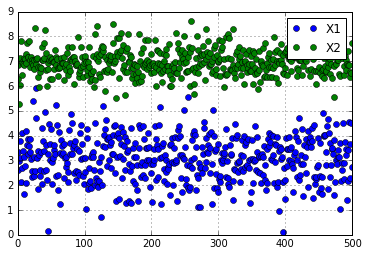

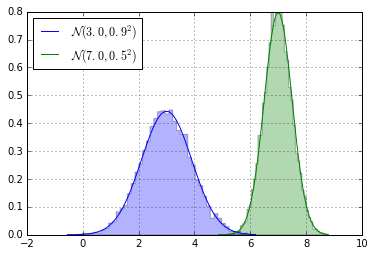

In [2]:
# Priklad - Sucin dvoch normalnych rozdeleni
#           Vytvorenie dvoch nezavislych premennych X1, X2

gauss = lambda x,mean,sigma: 1/(sigma*sqrt(2 * pi))*exp(-(x-mean)**2 / (2*sigma**2) )
label = lambda mean,sigma: r'$\mathcal{N}('+'{0:.1f}'.format(mean) + ',' + '{0:.1f}'.format(sigma) + '^2)$'

mean1, sigma1 = 3., 0.9                  # parametre rozdeleni       
mean2, sigma2 = 7., 0.5

m = 10000                                # pocet hodnot
X1 = normal(mean1, sigma1, m)            # vygenerovanie hodnot nahodnych premennych
X2 = normal(mean2, sigma2, m)

plt.plot(X1[0:500], 'bo', label='X1')    # zobrazenie hodnot premennych X1, X2
plt.plot(X2[0:500], 'go', label='X2' )
plt.grid()
plt.legend()
plt.show()
                                         # zobrazenie hustot pravdepodobnosti
_, n1, _ = plt.hist(X1, 50, normed=True, alpha=0.3, histtype='stepfilled')  
plt.plot(n1, gauss(n1, mean1, sigma1), 'b-', label=label(mean1,sigma1),) 

_, n2, _ = plt.hist(X2, 50, normed=True, alpha=0.3, histtype='stepfilled')  
plt.plot(n2, gauss(n2, mean2, sigma2), 'g-', label=label(mean2,sigma2)) 

plt.grid()
plt.legend(loc=2)
plt.show()

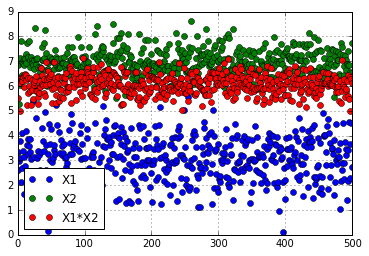

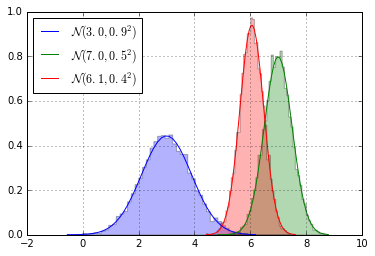

In [3]:
# Vypocet parametrov sucinu p1 * p1
mean = (mean1*(sigma2**2) + mean2*(sigma1**2))/(sigma1**2 + sigma2**2)
sigma = sqrt(sigma2**2 * sigma1**2)/(sigma1**2 + sigma2**2)

# vykreslenie parametrov sucinu
X3 = normal(mean, sigma, m)

plt.plot(X1[0:500], 'bo', label='X1')    # zobrazenie hodnot premennych X1, X2
plt.plot(X2[0:500], 'go', label='X2' )
plt.plot(X3[0:500], 'ro', label='X1*X2' )
plt.grid()
plt.legend(loc=3)
plt.show()

_, n1, _ = plt.hist(X1, 50, normed=True, alpha=0.3, histtype='stepfilled')  
plt.plot(n1, gauss(n1, mean1, sigma1), 'b-', label=label(mean1,sigma1),) 

_, n2, _ = plt.hist(X2, 50, normed=True, alpha=0.3, histtype='stepfilled')  
plt.plot(n2, gauss(n2, mean2, sigma2), 'g-', label=label(mean2,sigma2)) 

_, n3, _ = plt.hist(X3, 50, normed=True, alpha=0.3, histtype='stepfilled')  
plt.plot(n3, gauss(n3, mean, sigma), 'r-', label=label(mean,sigma))

plt.grid()
plt.legend(loc=2)
plt.show()

Je zrejmé, že výsledné rozdelenie má <b>menšiu</b> varianciu ako ktorékoľvek z pôvodných rozdelení a jeho stredná hodnota je <b>bližšia</b> k rozdeleniu s menšou varianciou.  

## Literatúra
